In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as mp
import csv
import random

In [4]:
data = pd.read_csv(r"/content/soc-sign-bitcoinotc.csv")
data


,Source,Target,Rating
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8
...,...,...,...
35587,4499,1810,1
35588,2731,3901,5
35589,2731,4897,5
35590,13,1128,1


In [10]:
edges = []
for i in range(0,35592):
  edges.append((data['Source'][i],data['Target'][i]))

edges

[(6, 2),
 (6, 5),
 (1, 15),
 (4, 3),
 (13, 16),
 (13, 10),
 (7, 5),
 (2, 21),
 (2, 20),
 (21, 2),
 (21, 1),
 (21, 10),
 (21, 8),
 (21, 3),
 (17, 3),
 (17, 23),
 (10, 1),
 (10, 6),
 (10, 21),
 (10, 8),
 (10, 25),
 (10, 2),
 (10, 3),
 (4, 26),
 (26, 4),
 (5, 1),
 (5, 6),
 (5, 7),
 (1, 5),
 (6, 4),
 (4, 6),
 (2, 4),
 (17, 28),
 (17, 13),
 (13, 17),
 (13, 29),
 (29, 13),
 (17, 20),
 (4, 31),
 (31, 4),
 (32, 6),
 (13, 1),
 (7, 34),
 (34, 7),
 (32, 1),
 (1, 32),
 (1, 34),
 (34, 1),
 (34, 13),
 (13, 34),
 (6, 7),
 (7, 6),
 (1, 17),
 (1, 31),
 (31, 1),
 (35, 6),
 (1, 13),
 (36, 37),
 (37, 36),
 (35, 1),
 (17, 1),
 (8, 1),
 (7, 29),
 (1, 20),
 (37, 44),
 (44, 37),
 (39, 45),
 (39, 7),
 (39, 44),
 (44, 39),
 (23, 17),
 (23, 19),
 (36, 46),
 (46, 36),
 (47, 1),
 (13, 7),
 (7, 13),
 (29, 51),
 (51, 29),
 (29, 52),
 (52, 29),
 (45, 39),
 (45, 53),
 (53, 45),
 (45, 54),
 (54, 45),
 (1, 54),
 (54, 1),
 (7, 3),
 (36, 41),
 (41, 36),
 (36, 21),
 (21, 36),
 (7, 36),
 (36, 7),
 (7, 53),
 (53, 7),
 (7, 55

In [11]:
G = nx.DiGraph()

# Add weighted edges to the graph
G.add_edges_from(edges)

# Compute node positions using a layout algorithm
# pos = nx.spring_layout(G)

# # Draw the graph with nodes and edges
# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=10, font_size=12, font_weight='bold')
# mp.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False)
eigenvector_centrality = nx.eigenvector_centrality(G)

print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)

Degree Centrality: {30: 0.003935901040202418, 1412: 0.004076468934495361, 3352: 0.07548495923531065, 5254: 0.04188923249929716, 5543: 0.039640146190610064, 7478: 0.012932246274950801, 3: 0.007590666291818949, 28: 0.03584481304470059, 39: 0.009699184706213101, 54: 0.006606691031768344, 108: 0.0018273826258082652, 152: 0.01012088838909193, 178: 0.013775653640708463, 182: 0.015603036266516728, 214: 0.02459938150126511, 271: 0.02698903570424515, 286: 0.0026707899915659264, 300: 0.003092493674444757, 348: 0.007871802080404836, 349: 0.002249086308687096, 371: 0.019820073095305032, 567: 0.003935901040202418, 581: 0.0016868147315153219, 584: 0.0026707899915659264, 586: 0.0032330615687377003, 590: 0.0056227157717177395, 604: 0.002951925780151813, 611: 0.003514197357323587, 8283: 0.0014056789429294349, 25: 0.012651110486364914, 6: 0.0452628619623278, 8: 0.03176834411020523, 19: 0.008574641551869553, 23: 0.013494517852122575, 29: 0.026848467809952207, 33: 0.008152937868990722, 35: 0.0245993815012

In [ ]:
alpha = 0.1  # Damping factor
beta = 1.0 / max(nx.adjacency_spectrum(G).real)  # Scaling factor
max_iter = 10000  # Increased maximum number of iterations
# katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=beta, max_iter=max_iter)


# # Calculate PageRank centrality
pagerank_centrality = nx.pagerank(G, alpha=0.85)  # Damping factor

# # Print centrality measures
# print("Katz Centrality:", katz_centrality)
print("PageRank Centrality:", pagerank_centrality)

PageRank Centrality: {30: 0.00017349553934328338, 1412: 0.0008141761230496596, 3352: 0.0017851250122027217, 5254: 0.0021500675059293226, 5543: 0.0010508052619841283, 7478: 0.000812430352613478, 3: 0.00020539498232448021, 28: 0.0016986730322136935, 39: 0.0003439790689580259, 54: 0.00034765464971898025, 108: 0.0004398371153454517, 152: 0.0005817197428805889, 178: 0.00029758488331950184, 182: 0.00016083873728146714, 214: 0.0016599199669365457, 271: 0.0013349240914416604, 286: 0.00017367757770305088, 300: 0.00015065607046072744, 348: 0.00017393564565284635, 349: 9.460415271381966e-05, 371: 0.0002892903392357495, 567: 0.00033152691295165287, 581: 0.00010905154270480289, 584: 0.00022615441013923313, 586: 0.00010518825019481072, 590: 0.00019458075864204938, 604: 0.00018151640169193398, 611: 0.0002164090559846353, 8283: 0.0003287923832617068, 25: 5.0487823458630175e-05, 6: 0.00031183250978437466, 8: 0.00032663557615950425, 19: 0.00013112179292607275, 23: 0.0001712239063742033, 29: 0.0001849098

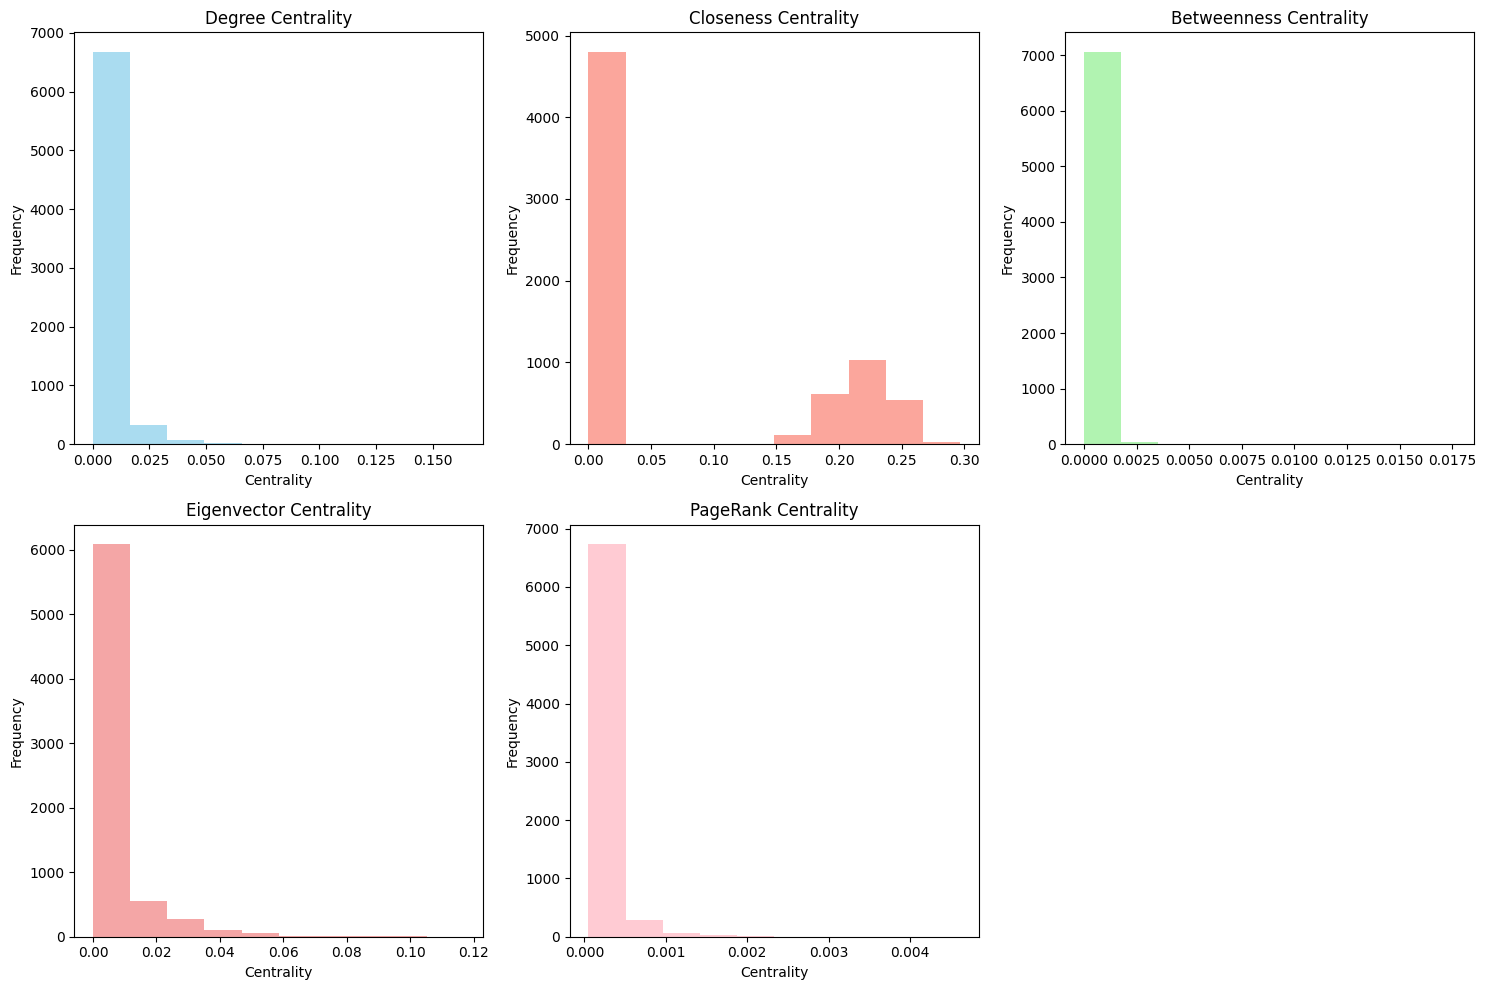

In [ ]:
mp.figure(figsize=(15, 10))

mp.subplot(2, 3, 1)
mp.hist(list(degree_centrality.values()), bins=10, alpha=0.7, color='skyblue')
mp.title('Degree Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 2)
mp.hist(list(closeness_centrality.values()), bins=10, alpha=0.7, color='salmon')
mp.title('Closeness Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 3)
mp.hist(list(betweenness_centrality.values()), bins=10, alpha=0.7, color='lightgreen')
mp.title('Betweenness Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2, 3, 4)
mp.hist(list(eigenvector_centrality.values()), bins=10, alpha=0.7, color='lightcoral')
mp.title('Eigenvector Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

mp.subplot(2,3,5)
mp.hist(list(pagerank_centrality.values()),bins=10,alpha=0.7,color = 'lightpink')
mp.title('PageRank Centrality')
mp.xlabel('Centrality')
mp.ylabel('Frequency')

# mp.subplot(2, 3, 5)
# mp.hist(list(pagerank_centrality.values()), bins=10, alpha=0.7, color='lightblue')
# mp.title('PageRank Centrality')
# mp.xlabel('Centrality')
# mp.ylabel('Frequency')

mp.tight_layout()
mp.show()


In [ ]:
# Calculate local clustering coefficient for each node
local_clustering = nx.clustering(G)

# Calculate global clustering coefficient
global_clustering = nx.transitivity(G)

# Calculate average local clustering coefficient
average_local_clustering = nx.average_clustering(G)

# Print results
# print("Local Clustering Coefficients:")
# for node, coefficient in local_clustering.items():
#     print(f"Node {node}: {coefficient}")

print("\nGlobal Clustering Coefficient:", global_clustering)
print("Average Local Clustering Coefficient:", average_local_clustering)


Global Clustering Coefficient: 0.05285122817867548
Average Local Clustering Coefficient: 0.08156344522820935


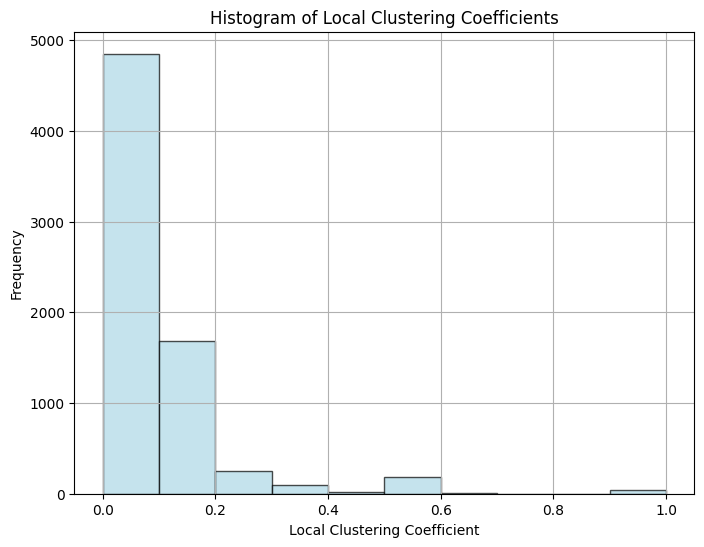

In [ ]:
# Calculate local clustering coefficient for each node
local_clustering = nx.clustering(G)

# Plot histogram for local clustering coefficients
mp.figure(figsize=(8, 6))
mp.hist(local_clustering.values(), bins=10, color='lightblue', edgecolor='black', alpha=0.7)
mp.xlabel('Local Clustering Coefficient')
mp.ylabel('Frequency')
mp.title('Histogram of Local Clustering Coefficients')
mp.grid(True)
mp.show()

In [ ]:
# Calculate reciprocity
reciprocity = nx.reciprocity(G)

# Calculate transitivity
transitivity = nx.transitivity(G.to_undirected())

# Print results
print("Reciprocity:", reciprocity)
print("Transitivity:", transitivity)

Reciprocity: 0.0564572905515532
Transitivity: 0.12547914899233995


In [ ]:
sorted_dict_degree = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1],reverse=True)}
sorted_dict_closeness = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1],reverse=True)}
sorted_dict_between = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1],reverse=True)}
sorted_dict_eigen = {k: v for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1],reverse=True)}

print({k: sorted_dict_degree[k] for k in list(sorted_dict_degree)[:10]})
print({k: sorted_dict_closeness[k] for k in list(sorted_dict_closeness)[:10]})
print({k: sorted_dict_between[k] for k in list(sorted_dict_between)[:10]})
print({k: sorted_dict_eigen[k] for k in list(sorted_dict_eigen)[:10]})

In [12]:
#Finding the Giant Component
Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
giant_component = G.subgraph(Gcc[0])


In [13]:
print("Information about the giant component:")
print("Number of nodes:", giant_component.number_of_nodes())
print("Number of edges:", giant_component.number_of_edges())
print("Average degree:", sum(dict(giant_component.degree()).values()) / giant_component.number_of_nodes())

Information about the giant component:
Number of nodes: 4709
Number of edges: 33461
Average degree: 14.211509874708005
